## Unsupervised Learning , PCA, SVM & Cross Validation

Import basic libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('../input/vehicle/vehicle.csv')

In [3]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

##### Our DatTypes:
1. We are going to deal with neumeric (Int and Float) datatype
2. Except the Traget Column (Class) which is object

In [5]:
print("The Number of Rows in our dataset:{} & Number of columns:{}".format(df.shape[0],df.shape[1]))

The Number of Rows in our dataset:846 & Number of columns:19


Let's check for the number of missing values

In [6]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

#### There are some missing values for 14 columns in our dataset.

In [7]:
df=df.fillna(df.median())

I am using median to fill the missing values , as using mean value may not be that effective if our data has outliers. 
The Reason being, outliers may have extreme values , and when we use mean or average to fill the missing values 
it may have an impact on our analysis. So , Median can be preferred compared to mean when filling missing values.

Tip:ML algorithms are sensitive to outliers 

In [8]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

Our Dataset looks somewhat good, all columns are consistent with neumeric value

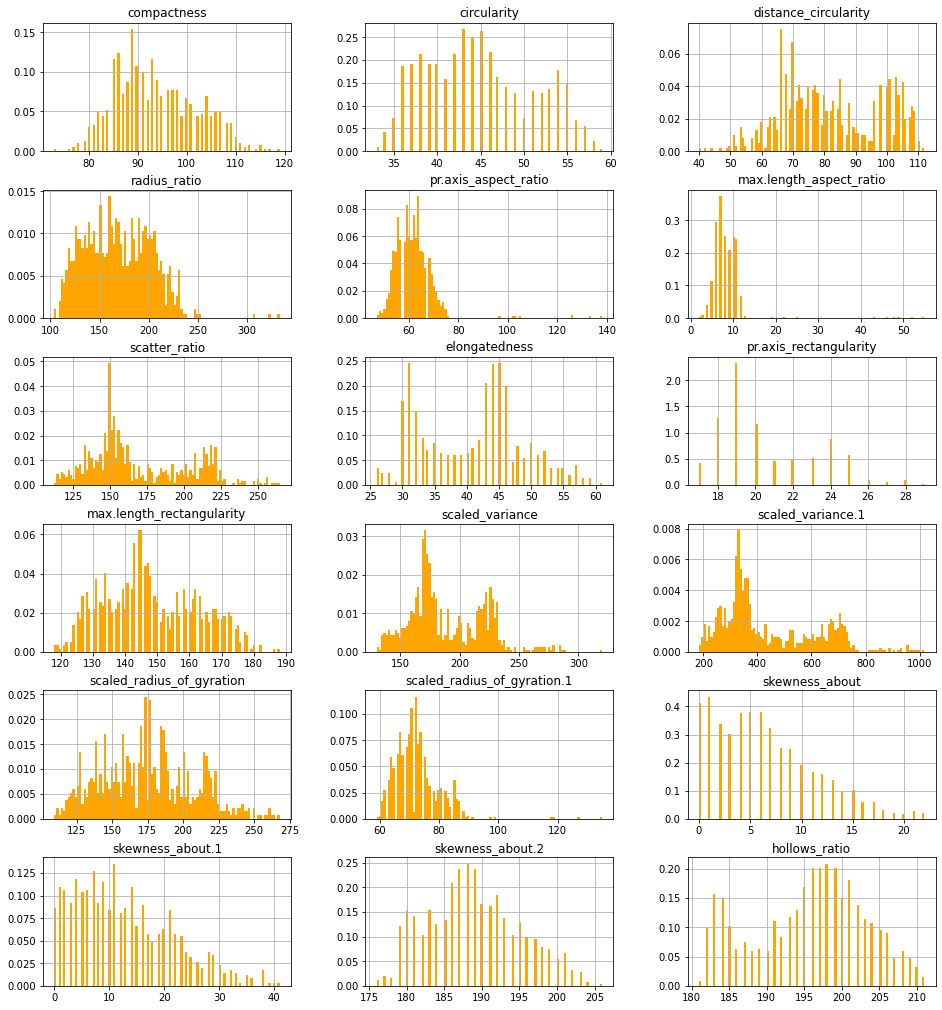

In [9]:
columns=list(df)
df[columns].hist(stacked=True,density=True, bins=100,color='Orange', figsize=(16,30), layout=(10,3)); 

From the Histogram we could infer that most of out independent variables are normally distributed and some have multiple gaussian.

### Traget Variable Callout

Our Target variable is class , with the various silhouette attributes of vehicles in different
angles provided, we are going to identify the type of vehicle.

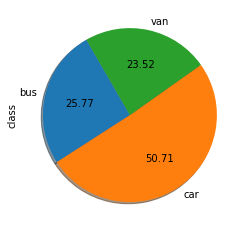

In [10]:
grp=df.groupby('class')['class'].count()
grp.plot.pie(shadow=True, startangle=120,autopct='%.2f')

##### Our Class label vehicle type consists of three types Van,Bus and Car. Among these Car's contribute to 51% of the data, Bus & van collectively contribute 49% of data

In [11]:
df_car=df[df['class']=='car']
df_van=df[df['class']=='van']
df_bus=df[df['class']=='bus']

###### Lets see if we can distinguish our classes based on some features.

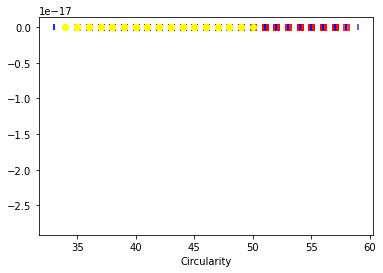

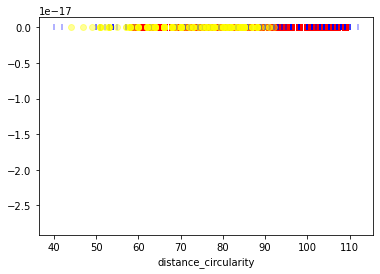

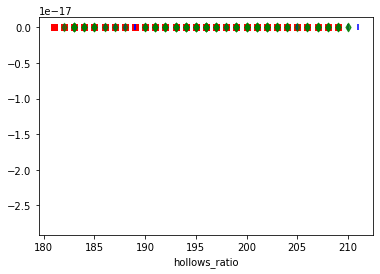

In [12]:
plt.scatter(df_bus['circularity'],np.zeros_like(df_bus['circularity']),marker='s',color='Red',alpha=0.5)
plt.scatter(df_car['circularity'],np.zeros_like(df_car['circularity']),marker='|',color='blue',alpha=0.8)
plt.scatter(df_van['circularity'],np.zeros_like(df_van['circularity']),marker='o',color='yellow',alpha=1)
plt.xlabel('Circularity')
plt.show()
plt.scatter(df_bus['distance_circularity'],np.zeros_like(df_bus['distance_circularity']),marker='s',color='Red',)
plt.scatter(df_car['distance_circularity'],np.zeros_like(df_car['distance_circularity']),marker='|',color='blue',alpha=0.4)
plt.scatter(df_van['distance_circularity'],np.zeros_like(df_van['distance_circularity']),marker='o',color='yellow',alpha=0.4)
plt.xlabel('distance_circularity')
plt.show()
plt.scatter(df_bus['hollows_ratio'],np.zeros_like(df_bus['hollows_ratio']),marker='s',color='Red',)
plt.scatter(df_car['hollows_ratio'],np.zeros_like(df_car['hollows_ratio']),marker='|',color='blue',alpha=0.4)
plt.scatter(df_van['hollows_ratio'],np.zeros_like(df_van['hollows_ratio']),marker='d',color='green',alpha=0.4)
plt.xlabel('hollows_ratio')
plt.show()

Parameters like Circularity , distnace circularity & hollows ratio for all the vehicle types Van, Bus and Car seem to overlap with each other with some slight varition and it looks tough to differentiate classes with these attributes visually.

Text(0.5, 1.0, 'elongatedness Distribution')

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


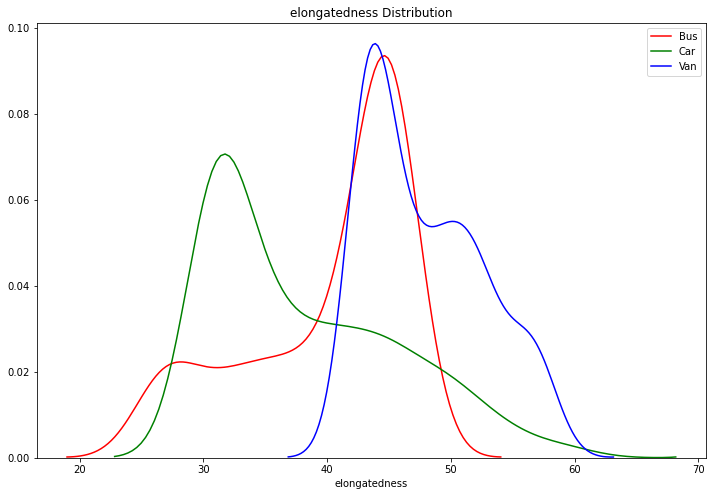

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(df_bus['elongatedness'],kde=True,color='r',hist=False,label="Bus")
sns.distplot(df_car['elongatedness'],kde=True,color='G',hist=False,label="Car")
sns.distplot(df_van['elongatedness'],kde=True,color='B',hist=False,label="Van")
plt.legend()
plt.title("elongatedness Distribution")

Distribution of elongatedness for car seems to be more compared to bus and van

Text(0.5, 1.0, 'max.length_rectangularity Distribution')

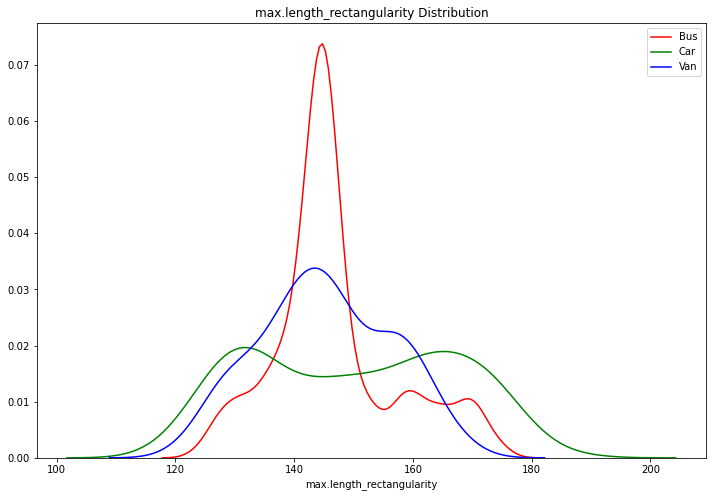

In [14]:
plt.figure(figsize=(12,8))
sns.distplot(df_bus['max.length_rectangularity'],kde=True,color='r',hist=False,label="Bus")
sns.distplot(df_car['max.length_rectangularity'],kde=True,color='G',hist=False,label="Car")
sns.distplot(df_van['max.length_rectangularity'],kde=True,color='B',hist=False,label="Van")
plt.legend()
plt.title("max.length_rectangularity Distribution")

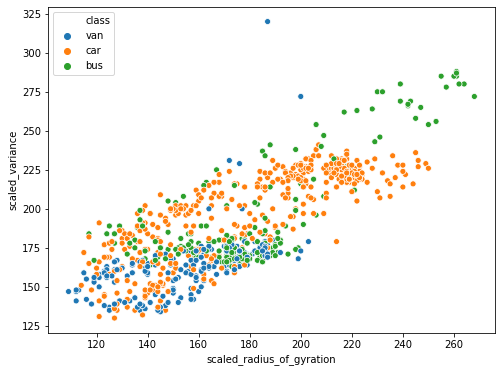

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['scaled_radius_of_gyration'],df['scaled_variance'],hue=df['class'],markers='+')

Scaled Radius of gyration and scaled variance have a linear relationship for all vehicle types.

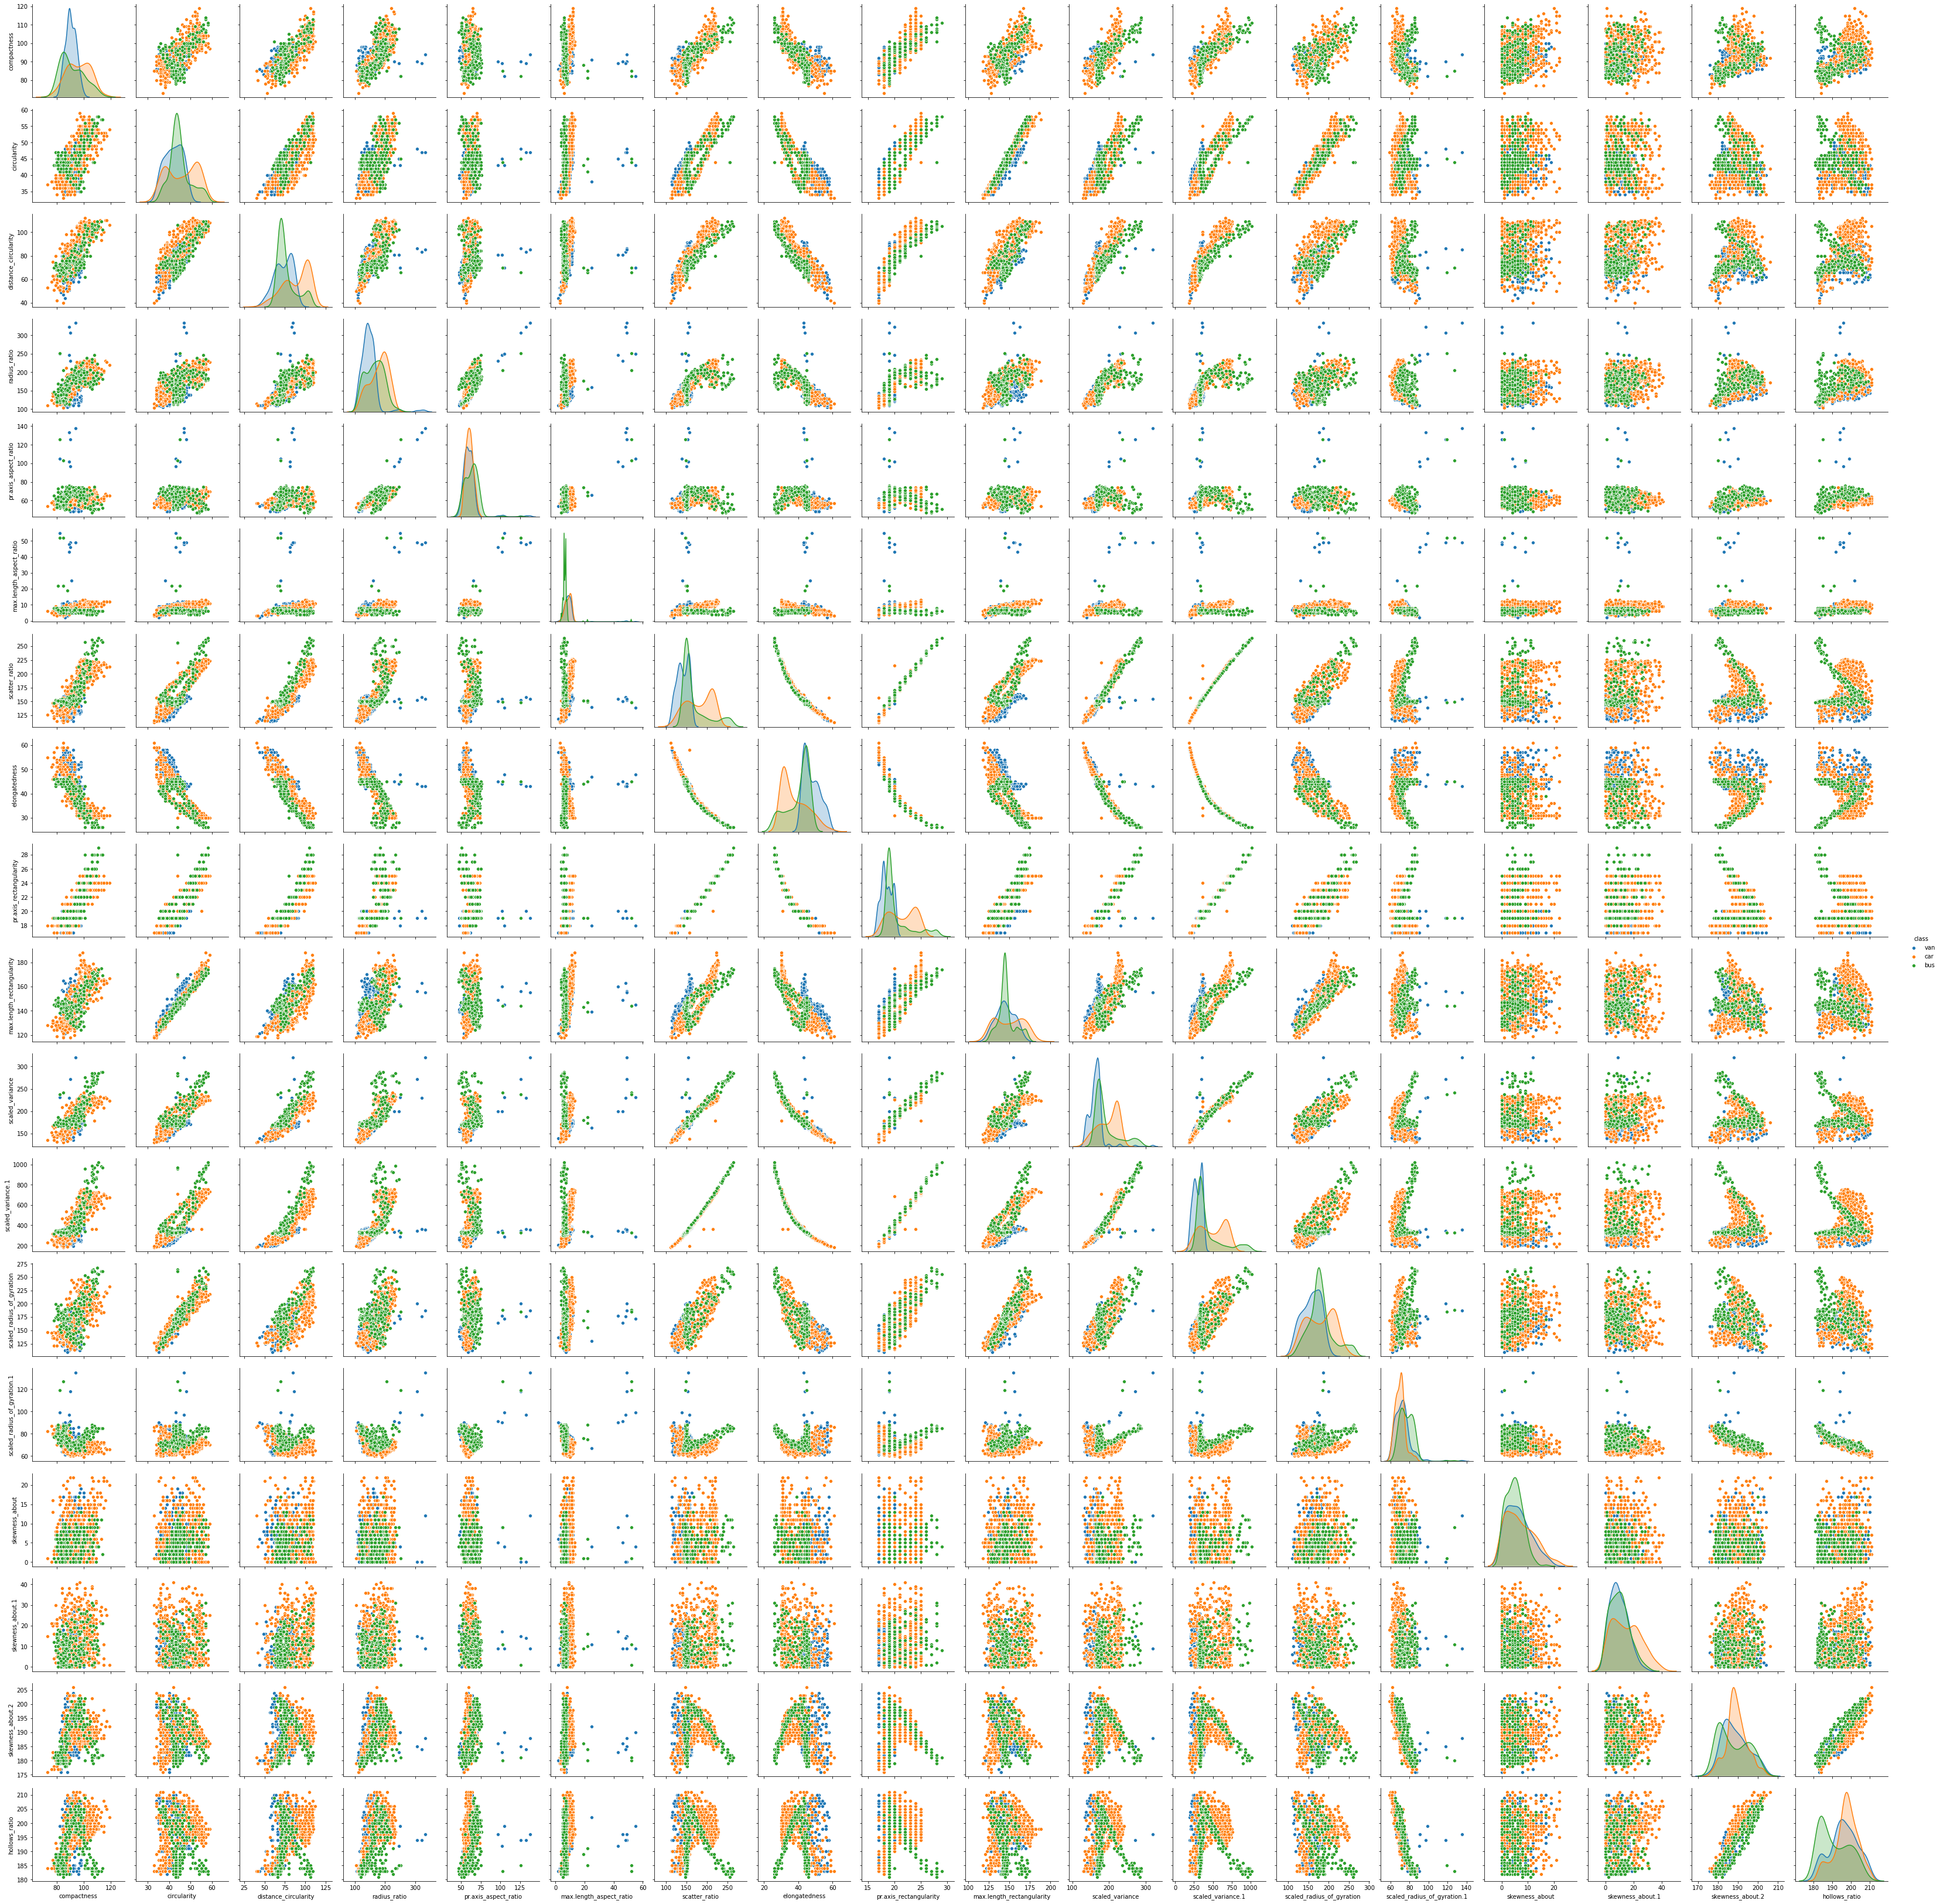

In [16]:
#Print the corelation between columns in tabular format 
#core=df.corr()
#print(core)
#Using Pair plot to visualize the corelation
sns.pairplot(df,hue='class');

#### Pairplot Analysis:

##### Through The Diagonal :
1. Through the diagonal, the density distribution clearly states that for each class there are some differences in the distribution of attributes though there is some overlap.
2. Mostly, the distribution seems normal and data might have been collected from multiple gaussians or multiple source.
3. We could see multiple peaks for same class distribution.

##### Upper part of the Diagnol:
1. In pairplot analysis , it's fine if we consider any one part of plot either the upper or lower from the diagonal as the other is the mirror image.
2. We could observe that some features have a positive linear realtionship with each other.
3. Some have negative linear relation ship and some do not have any relation(Cloud like Figures).

#### Along the diagonal , there seem to be noise present to our data, some attributes have extended tails (both left & right) , As we proceed further its important to take care of these in data preprocessing.

#### We can use some techniques like Zscore or IQR score 

#### Box PLot to identify the outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

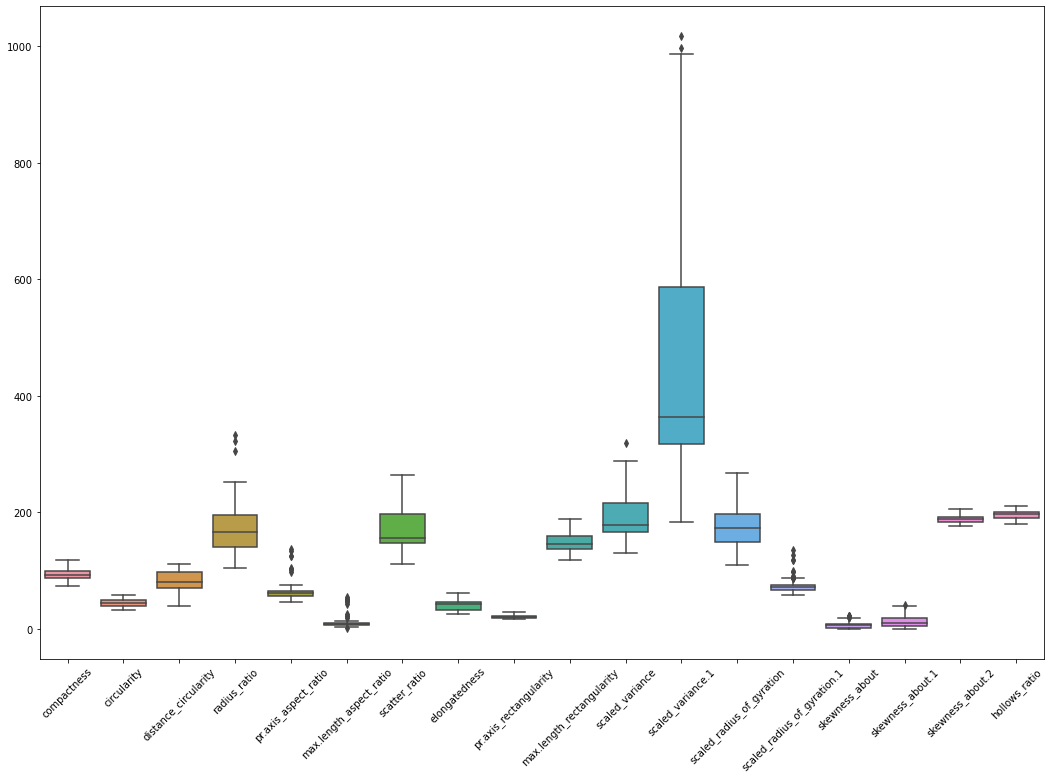

In [17]:
plt.figure(figsize=(18,12))
sns.boxplot(data=df) 
plt.xticks(rotation=45)

#### Box Plot Observation :

1. Most of out independent features have the central tendancy exactly at the middle, except some which are skewed.
2. There are outliers in columns radius_ratio,axis aspect_ratio,max length aspect ratio, scaled radius of gyration etc, we can see if these attributes have impact on our analysis further in feature engineering. If they do we should think of options to handle outliers. 
3. If these attributes do not have impact on our analysis we could also ignore these columns before traning our model.
4. In this dataset the attributes having outliers are getting dropped from the analysis , The reaon being these attributes also have high collineratity , In order to avoid the multicolliniearity dispute I have dropped them in the upcoming steps. 

In [18]:
df.skew()

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
dtype: float64

##### Mostly, all our attributes in the dataset have symmentrical distribution 

1. pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_radius_of_gyration.1 have positive skewness and the tail is very high towrdas the right from the median.
2. hollows_ratio alone has a negative skewness where the tail is towards left and away from the median.

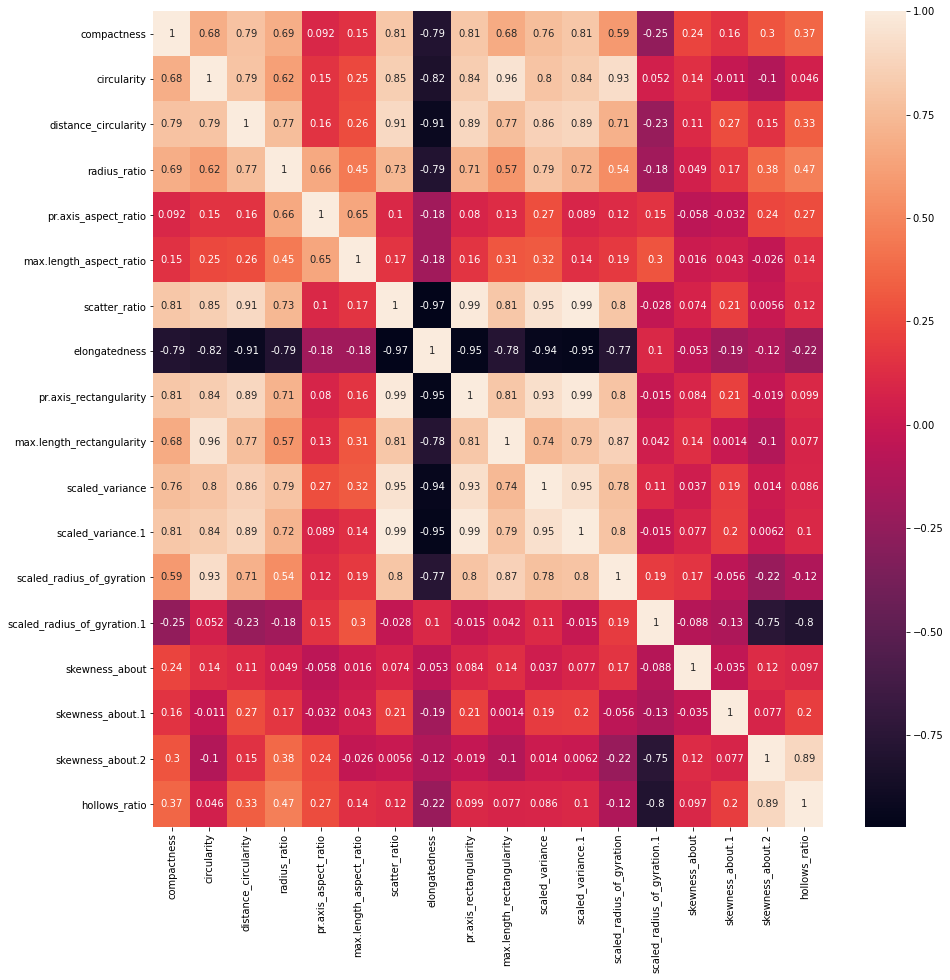

In [19]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

#### Attribute Selection 

From the above heatmap, it is evident that there is a lot of positive correlation between the attributes.

When we have two variables which are highly coreraled, it is better to drop one as it may cause the problem of multicollinearity. 

For this problem statement , I am using a threshold of 0.93(0.93 allows me to delete one more column than 0.95) to remove variables those have high correlation and I am going to drop them as they contain redundant information.

In [20]:
Cor_Matrix=df.corr().abs()
Cor_Matrix
upper_tri = Cor_Matrix.where(np.triu(np.ones(Cor_Matrix.shape),k=1).astype(np.bool))
#print(upper_tri)
to_drop =[column for column in upper_tri.columns if any(upper_tri[column] > 0.93)]

print("These columns can be dropped as they are redundant:",to_drop[0:6])

These columns can be dropped as they are redundant: ['elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1']


#### Attribute Selection For Analysis

In [21]:
df1=df.drop(['elongatedness','pr.axis_rectangularity','max.length_rectangularity','scaled_variance','scaled_variance.1'],axis=1)
print("The Number of Rows in our dataset :{} & Number of columns after remving multicollinearity:{}".format(df1.shape[0],df1.shape[1]))


The Number of Rows in our dataset :846 & Number of columns after remving multicollinearity:14


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

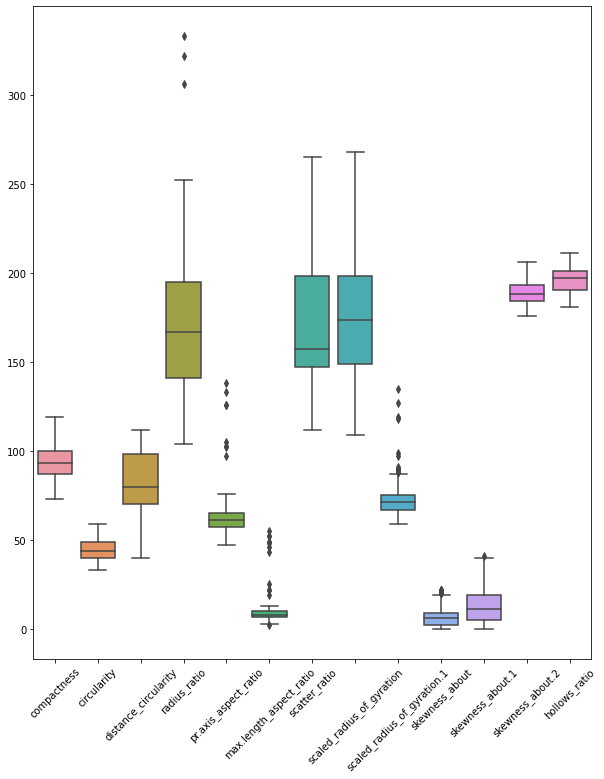

In [22]:
plt.figure(figsize=(10,12))
sns.boxplot(data=df1) 
plt.xticks(rotation=45)

#### Outlier Removal : After selecting the features as above we could see that , we still have the outliers present in the dataset for some attributes.

###### How are we going to handle them??

###### We are going to find the IQR range for each column (Q3 -Q1 ), and remove any data points beyond that range to remove outliers

In [23]:
#IQR Calculation 

Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR= Q3 - Q1

IQR

compactness                    13.00
circularity                     9.00
distance_circularity           28.00
radius_ratio                   54.00
pr.axis_aspect_ratio            8.00
max.length_aspect_ratio         3.00
scatter_ratio                  51.00
scaled_radius_of_gyration      49.00
scaled_radius_of_gyration.1     8.00
skewness_about                  7.00
skewness_about.1               14.00
skewness_about.2                9.00
hollows_ratio                  10.75
dtype: float64

In [24]:
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(815, 14)

#### Now we have removed outliers and the number of rows in our original data has been reduced from 846 to 815

##### Lets again plot a box plot and see the outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

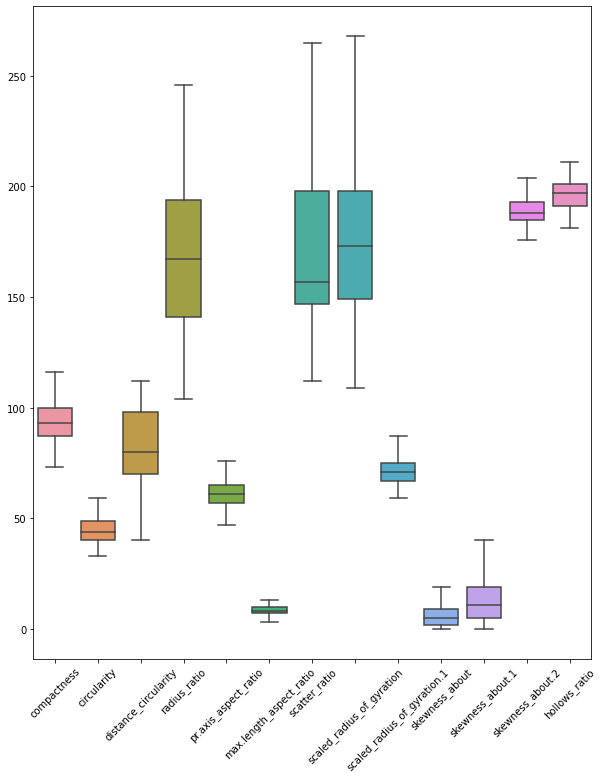

In [25]:
plt.figure(figsize=(10,12))
sns.boxplot(data=df1) 
plt.xticks(rotation=45)

As you can see , Outliers have been removed from dataset and our data looks clean.

### SVM on Raw Data with Scaling 

1. We are not certain about unit of measurement for all atributes in our data, by the looks of it we could see that some have high magnitude and some have low mangnitude. 
2. Hence, it is better to scale our data to have them in the same scale.
3. I am using Standard Scaler here 

#####################Classification Report & Accuracy SCore#####################
----SVM Model ----
Model Score on Training data with selected features :96.84210526315789
Model Score on Testing  data with selected features :93.46938775510203
Accuracy Score of SVM on Test Data:93.46938775510203
              precision    recall  f1-score   support

         bus       0.95      0.97      0.96        65
         car       0.97      0.92      0.94       123
         van       0.85      0.93      0.89        57

    accuracy                           0.93       245
   macro avg       0.93      0.94      0.93       245
weighted avg       0.94      0.93      0.94       245



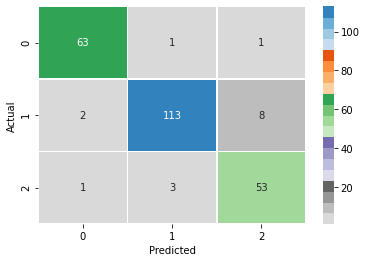

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,RocCurveDisplay
from sklearn.preprocessing import StandardScaler

X_MNMX=df1.drop(['class'],axis=1)
Y_MNMX=df1['class']
#X_MNMX=X_MNMX.apply(zscore)
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X_MNMX,Y_MNMX,test_size=0.3,random_state=23)
sc=StandardScaler()
X_Train=sc.fit_transform(X_Train)
X_Test=sc.transform(X_Test)


SVM1=SVC(C=1.0,kernel='rbf')
SVM1.fit(X_Train,Y_Train)
#print(SVM1.score(X_Train,Y_Train))
#print(SVM1.score(X_Test,Y_Test))
PRED_SVM_M1=SVM1.predict(X_Test)
CM_SVM_M1=confusion_matrix(Y_Test,PRED_SVM_M1)
#print(CM_SVM_M1)

print("#####################Classification Report & Accuracy SCore#####################")
print("----SVM Model ----")
print("Model Score on Training data with selected features :{}".format(SVM1.score(X_Train,Y_Train) * 100))
print("Model Score on Testing  data with selected features :{}".format(SVM1.score(X_Test,Y_Test) * 100))
print("Accuracy Score of SVM on Test Data:{}".format(accuracy_score(Y_Test,PRED_SVM_M1)*100))
print(classification_report(Y_Test,PRED_SVM_M1))
sns.heatmap(CM_SVM_M1,annot=True,xticklabels=True,yticklabels=True,fmt='g',linewidths=.5,cmap='tab20c_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Our SVM Model has a Accuracy score of 93.46, Mostly our model has predicted the class of vehicles correctly though there are some misclassifications

Our Precision & recall scores are also observed to be good.

### k- Fold CROSS VALIDATION 

#### Cross Validation is a technique to evaluate  performance of the model and see how well it can perform on "unseen data".
#### The K value set  is the number of folds that splits the data into folds, when the estimator trains on k-1 folds , it tests the performance on the left out fold and publishes the score .
#### This process is iterated and accuracy score gets collected for each iteration with change in fold.
#### Standard deviation is calculated on the K accuracy scores

In [27]:
# Applying k-Fold Cross Validation 
from sklearn.model_selection import KFold,cross_val_score
Folds=10
seed=23
kfold=KFold(shuffle=True,n_splits=Folds,random_state=seed)
accuracies = cross_val_score(estimator = SVM1, X = X_MNMX, y = Y_MNMX, cv = kfold) 
accuracies
print("K Fold score mean:{}".format(accuracies.mean()*100))
print("K Fold score standard deviation:{}".format(accuracies.std()*100))

K Fold score mean:65.8882866606444
K Fold score standard deviation:2.3854534624309447


#### As you can see from the above code , we have received a mean accuracy score of 65.9% with a standard deviation of 2.38.
#### What we can infer from this is that our SVM model on raw dataset can give us a accuracy 63.5% to 68.26% on unseen data.
###### This score is not that great, We shall try to improve our models further

### Principal Component Analysis 
#### The idea of PCA is to  reduce the dimensionality of a data set consisting of a large number of interrelated variables while retaining as much as possible of the variation present in the data set.

In [28]:
#Import PCA from sklearn
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [29]:
# Dropping those columns which had high correlation that we found during EDA
df=df.drop(['elongatedness','pr.axis_rectangularity','max.length_rectangularity','scaled_variance','scaled_variance.1'],axis=1)

#### PCA STEP 1 :
######  Scaling the independent variables as different units of measure & magnitude will have impact in the PCA analysis.

In [30]:
#Scale and split data 
X_PCA=df.drop(['class'],axis=1)
Y_PCA=df['class']
X_PCA=X_PCA.apply(zscore)

PC=PCA(n_components=10,random_state=23)
PC_DF=PC.fit_transform(X_PCA)
#X_Train_PCA=PC.transform(X_PCA_Train)

#### PCA STEP 2 :
##### Create the covarience matrix 

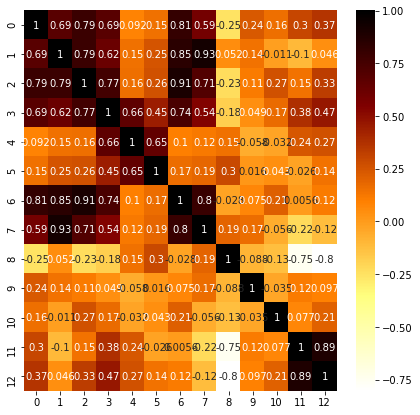

In [31]:
covMatrix = np.cov(X_PCA,rowvar=False)
plt.subplots(figsize=(7,7))
sns.heatmap(covMatrix,annot=True,cmap='afmhot_r')

#### PCA STEP 3:
##### Find the Eigen values & Eigen vectors

In [32]:
print("##############Eigen Values##############")
print(PC.explained_variance_)
print("##############Eigen Vectors##############")
print(PC.components_)

##############Eigen Values##############
[5.13577772 2.86111768 1.8163822  1.10471346 0.90343614 0.40439897
 0.32151897 0.18858871 0.11119659 0.05560325]
##############Eigen Vectors##############
[[-0.37955953 -0.37411123 -0.41026001 -0.39407966 -0.16056794 -0.16275129
  -0.39875328 -0.33458497  0.08888106 -0.07854899 -0.08614528 -0.11908759
  -0.18294623]
 [-0.03911724  0.2254973   0.02769003 -0.08080665 -0.05181429  0.08245312
   0.14705218  0.3048412   0.50136782 -0.03424991 -0.11043607 -0.53430323
  -0.51581954]
 [-0.17900244 -0.1110171  -0.11890676  0.23711443  0.64181759  0.57247904
  -0.16483592 -0.12225999  0.2602041  -0.16112879 -0.06398174  0.04240844
   0.06268977]
 [-0.0426501  -0.10221599  0.13262821  0.0390383  -0.07752731 -0.01607941
   0.13311721 -0.13638375  0.03184825 -0.60629707  0.73404576 -0.1340606
  -0.02496018]
 [ 0.03349599 -0.11843545  0.00182556 -0.0679089  -0.02742982  0.22585974
  -0.05770403 -0.09799041  0.14544824  0.74505858  0.57567902 -0.08610606
  -0.

#### PCA STEP 4 :
##### Find the amount of varience captured by each  principal components and visulize them 

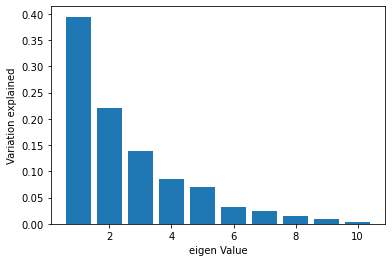

In [33]:
plt.bar(list(range(1,11)),PC.explained_variance_ratio_, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

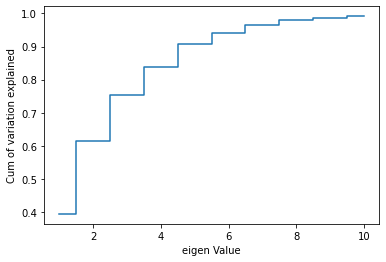

In [34]:
plt.step(list(range(1,11)),np.cumsum(PC.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

####  Principal Components that capture about 95% of the variance in the data

In [35]:
print('Explained variation per principal component: {}'.format(PC.explained_variance_ratio_))
P_Components=PC.explained_variance_ratio_
print("The Ideal number of components that could explain:{}% of variance in data is 7".format(np.sum(P_Components[0:7])*100))

Explained variation per principal component: [0.39459285 0.21982583 0.13955655 0.08487751 0.06941294 0.03107084
 0.02470299 0.01448968 0.00854347 0.00427212]
The Ideal number of components that could explain:96.40395201753886% of variance in data is 7


#### Creating a dataframe  and using Principal Components instead of the original data

In [36]:
PCA_DF=pd.DataFrame(data=PC_DF,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

PCA_DF['Y']=Y_PCA
PCA_DF

PC1       PC2        PC3       PC4       PC5       PC6       PC7  \
0   -0.712478 -0.027431   0.891090  0.136389  0.083580 -0.261853 -0.609014   
1    0.981789 -0.569570  -0.333745 -0.130475  0.714348  0.657169  0.018276   
2   -3.023924  0.759785  -0.252083 -1.195922  0.667522 -0.336433  0.108033   
3    0.574858 -2.936428   0.345945 -0.326857 -0.285551  0.528518  0.237770   
4   -0.831176  5.762934  11.032897 -0.683536  3.411565  2.089902  1.550213   
..        ...       ...        ...       ...       ...       ...       ...   
841  0.226148 -0.566399   0.261205  1.206821  1.025685 -0.585825  0.241027   
842  0.127274  0.141409   0.822883  1.246701 -0.221494  0.412832 -0.736851   
843 -3.363874  0.442689   0.421442 -0.230724 -1.353411  0.378842  0.466284   
844  1.982193 -1.236163  -0.132863  1.901169 -0.045920  0.203352 -0.367225   
845  3.435244 -0.194481  -0.347209  1.260369 -0.107811  0.060302  0.140739   

          PC8       PC9      PC10    Y  
0    0.005705 -0.900104  0.156304  van  
1   -0.111515  0.253003  0.315365  van  
2   -0.561380  0.062988 -0.091208  car  
3   -0.070629  0.133676  0.480235  van  
4    1.471058  1.469090 -0.038122  bus  
..        ...       ...       ...  ...  
841 -0.715720  0.014572 -0.070649  car  
842  0.082188 -0.336327  0.173336  van  
843 -0.463016 -0.433221  0.247959  car  
844 -0.218856 -0.061762 -0.519877  car  
845 -0.052106 -0.202507 -0.029166  van  

[846 rows x 11 columns]

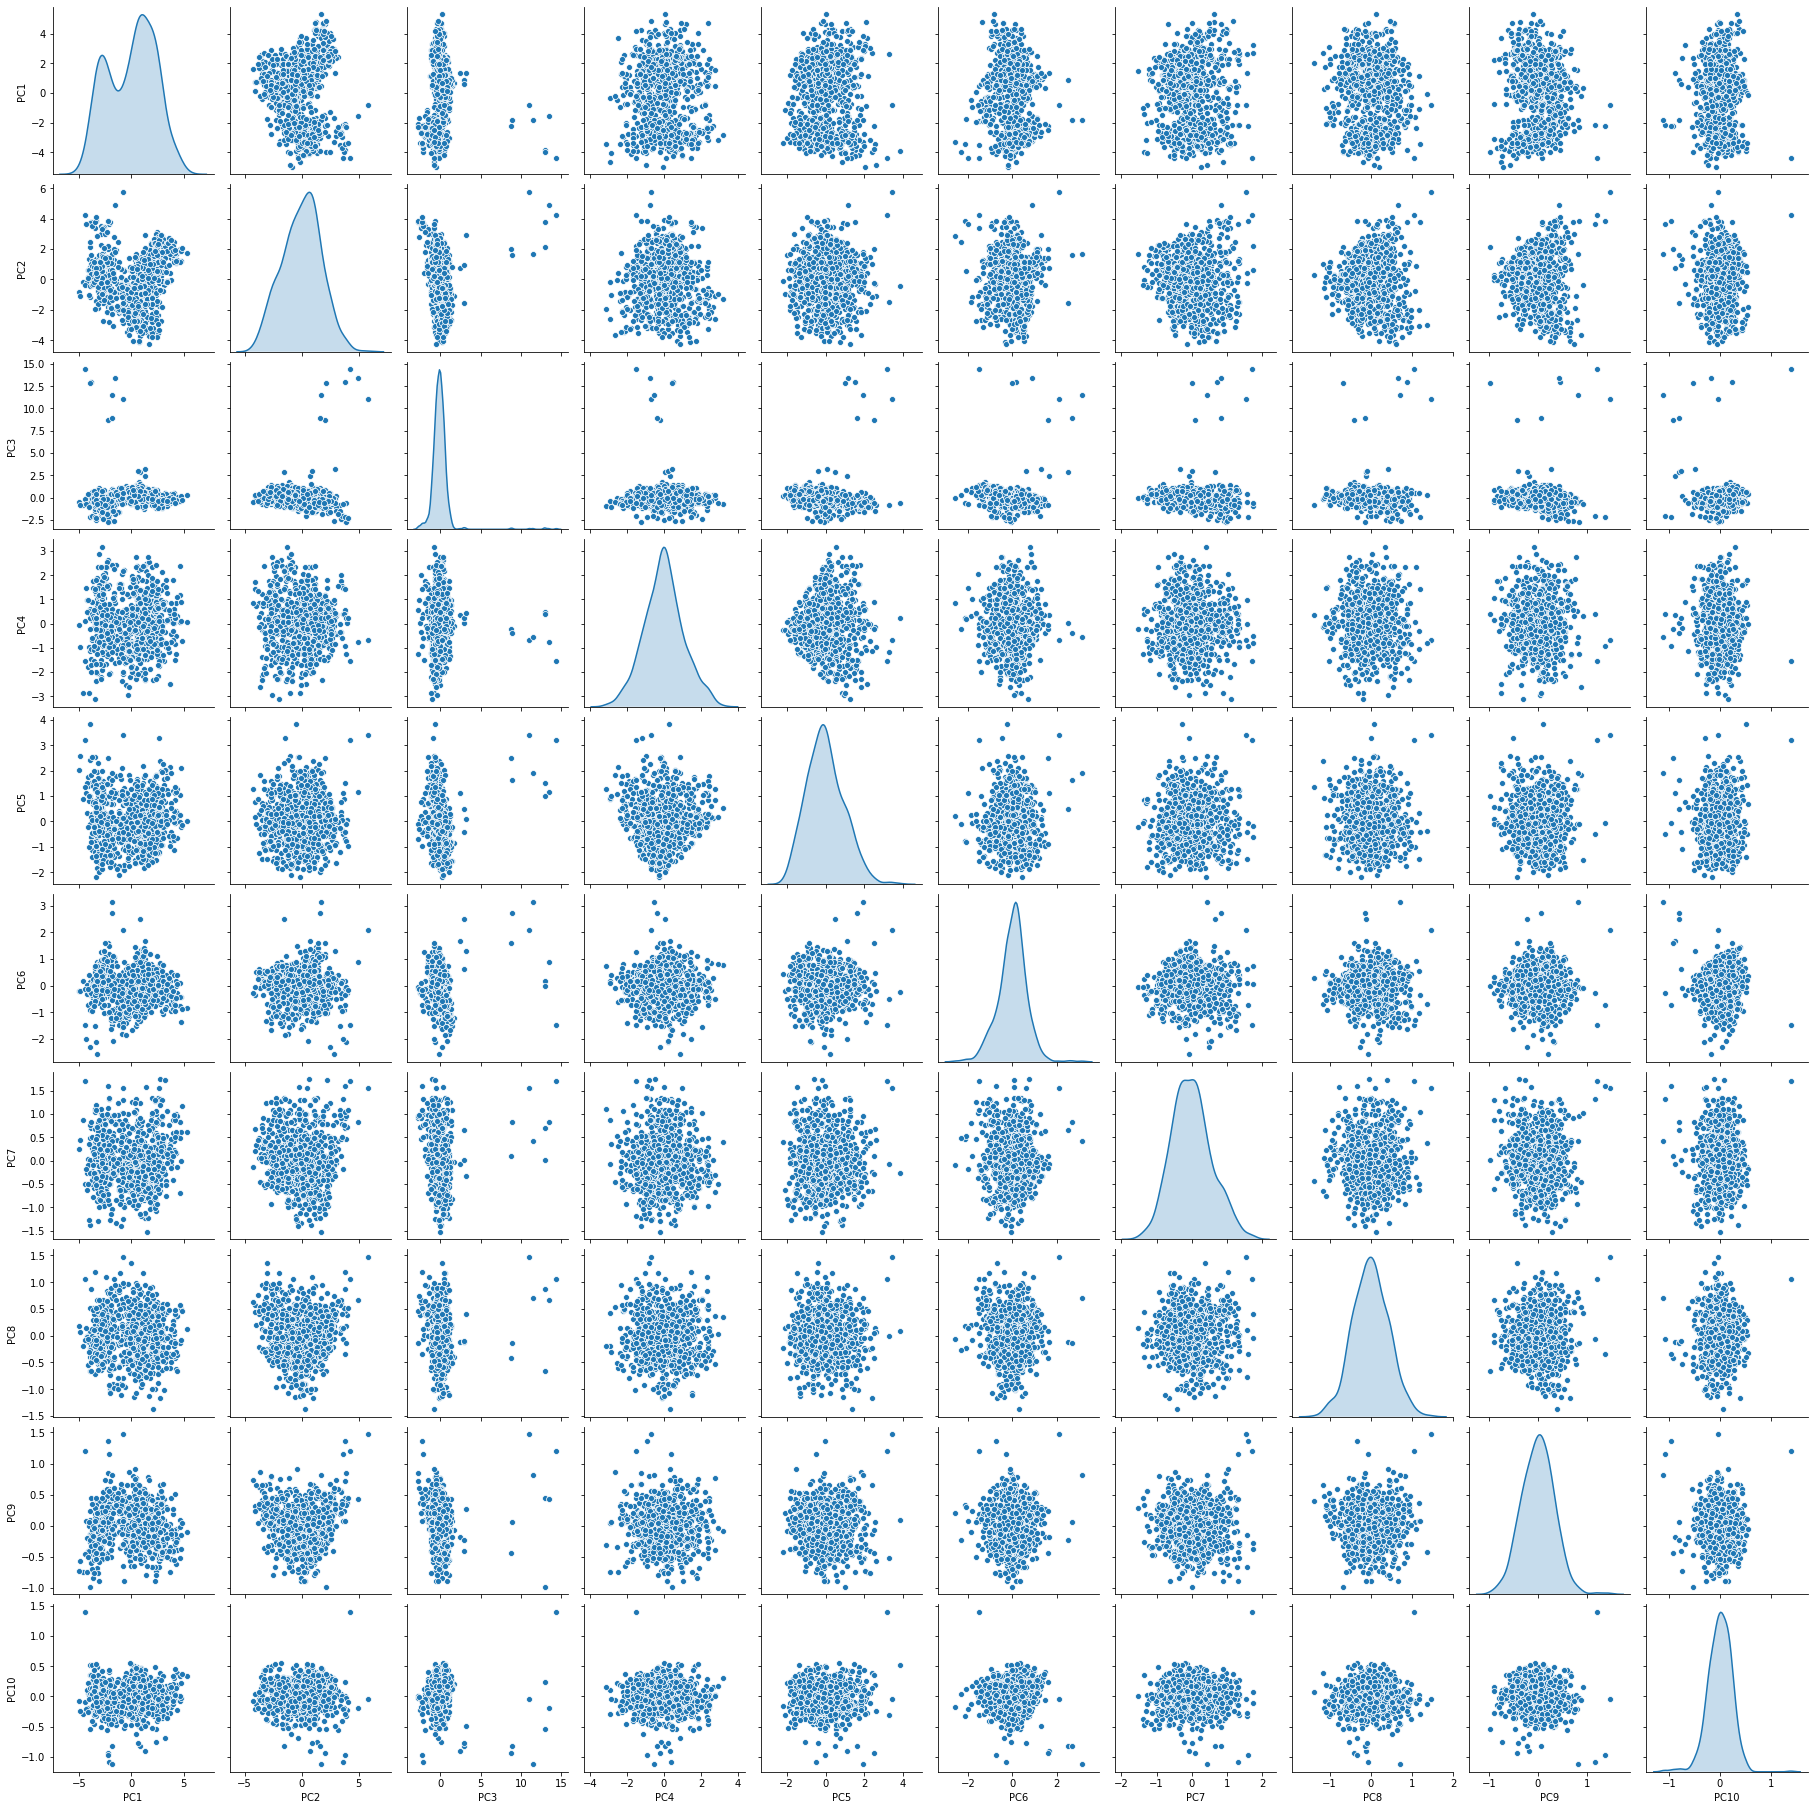

In [37]:
sns.pairplot(PCA_DF,diag_kind='kde');

#### As shown by the pairplot all our PCA components are independent , and we are not able to see any correlation between each other and have normal distribution

#### Support Vector Machine on PCA data 

In [38]:
X_PCA_DF=PCA_DF.drop(['Y'],axis=1)
Y_PCA_DF=PCA_DF['Y']

In [39]:
X_PCA_Train,X_PCA_Test,Y_PCA_Train,Y_PCA_Test=train_test_split(X_PCA_DF,Y_PCA_DF,test_size=0.3,random_state=23)

In [40]:
PCA_Final=PCA(n_components=7,random_state=23)

In [41]:
SVM3=SVC(C=1.0,kernel='rbf')

In [42]:
SVM3.fit(X_PCA_Train,Y_PCA_Train)

SVC()

In [43]:
PRED_PCA=SVM3.predict(X_PCA_Test)

In [44]:
CM_SVM_PCA=confusion_matrix(Y_PCA_Test,PRED_PCA)

#####################Classification Report & Accuracy SCore of PCA Data  on SVM#####################
----SVM Model ----
Model Score on Training data with PCA features :96.79054054054053
Model Score on Testing  data with PCA features :94.09448818897637
Accuracy Score of SVM on Test Data:94.09448818897637
              precision    recall  f1-score   support

         bus       0.95      0.93      0.94        60
         car       0.96      0.96      0.96       136
         van       0.88      0.91      0.90        58

    accuracy                           0.94       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.94      0.94      0.94       254



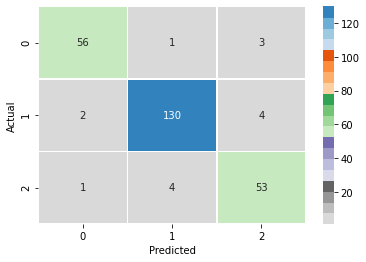

In [45]:
print("#####################Classification Report & Accuracy SCore of PCA Data  on SVM#####################")
print("----SVM Model ----")
print("Model Score on Training data with PCA features :{}".format(SVM3.score(X_PCA_Train,Y_PCA_Train) * 100))
print("Model Score on Testing  data with PCA features :{}".format(SVM3.score(X_PCA_Test,Y_PCA_Test) * 100))
print("Accuracy Score of SVM on Test Data:{}".format(accuracy_score(Y_PCA_Test,PRED_PCA)*100))
print(classification_report(Y_PCA_Test,PRED_PCA))
sns.heatmap(CM_SVM_PCA,annot=True,xticklabels=True,yticklabels=True,linewidths=.5,cmap='tab20c_r',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### k- Fold CROSS VALIDATION 

In [46]:
# Applying k-Fold Cross Validation 
from sklearn.model_selection import cross_val_score,KFold
kfold_pca=KFold(shuffle=True,n_splits=10,random_state=23)
accuracies = cross_val_score(estimator = SVM3, X = X_PCA_DF, y = Y_PCA_DF, cv = kfold_pca) 
accuracies
print("K Fold score mean:{}".format(accuracies.mean()*100))
print("K Fold score standard deviation:{}".format(accuracies.std()*100))

K Fold score mean:94.08823529411764
K Fold score standard deviation:3.3720269680724955


### Inference : 
1. First, we did SVM on this dataset with 14 attributes and we got a model score of 93% on test data, Through KFOLD Cross   validation we evaluated that our model1 could give us accuracy of range 63.5% to 68.26% when exposed to unseen data.

2. Secondly, we did PCA on the raw data. Identified that almost just 7 attributes could capture about 96% of varience in the data. This time , we perfomred the same SVM algorithm on this principal components.

3. We could see that on test data on PCM components, our model gave a score of 94%. However, on K fold cross validation we could see that on unseen data our model could perform with a accuracy range 90.71 % to 97.45%. This is a really a great score.

PCA plays a vital role. Ignoring the less impact variables it focuses on variables that can display high varience present in data and enhancing performance of our model.


### Conclusion- "When the Rubber meets the Road"

1. Though the Train and test scores of both Raw and PCA data through SVM were not that different, Evaluating their performance on unseen data using K Fold cross validation gave a phenomenol impact on  model bulit on PCA dataset. Furthermore, On large datasets PCA can be helpful minimizing the computaional cost, complexity of the model.
2. Raw Data Cross Validation Range -  63.5% to 68.26%.
3. PCA Data Cross Validation Range -  90.71%to 97.45% with a confidence intravel of 95%

